<a href="https://colab.research.google.com/github/Framos22/-MLA_FR/blob/main/FinalProject_Classification_FR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  
**Felix Ramos**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
#example - you will replace this with the models you are actually using.
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## Imports for Splitting Data and Building Pipeline


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [6]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [7]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [8]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [19]:
# Get the data from the internet
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data"
data = pd.read_csv(url, header=None)

# Give the columns easy names
data.columns = ['Age', 'OperationYear', 'Nodes', 'Survived']

# Change Survived: 1 means survived (0), 2 means died (1)
data['Survived'] = data['Survived'].map({1: 0, 2: 1})

# Show the size of our data and the first few rows
print("How many rows and columns:", data.shape)
print("First few rows:")
print(data.head())

How many rows and columns: (306, 4)
First few rows:
   Age  OperationYear  Nodes  Survived
0   30             64      1         0
1   30             62      3         0
2   30             65      0         0
3   31             59      2         0
4   31             65      4         0


### Statistical and Visual Exploration




Basic Info About Our Data:
              Age  OperationYear       Nodes    Survived
count  306.000000     306.000000  306.000000  306.000000
mean    52.457516      62.852941    4.026144    0.264706
std     10.803452       3.249405    7.189654    0.441899
min     30.000000      58.000000    0.000000    0.000000
25%     44.000000      60.000000    0.000000    0.000000
50%     52.000000      63.000000    1.000000    0.000000
75%     60.750000      65.750000    4.000000    1.000000
max     83.000000      69.000000   52.000000    1.000000

Any Missing Numbers?
Age              0
OperationYear    0
Nodes            0
Survived         0
dtype: int64


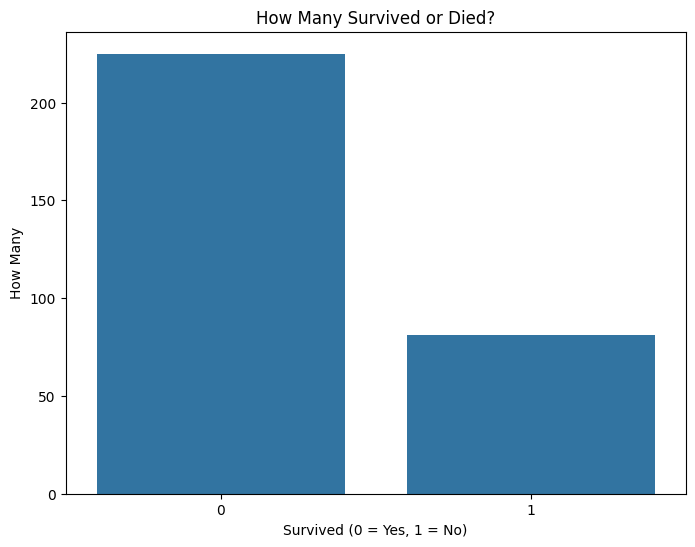

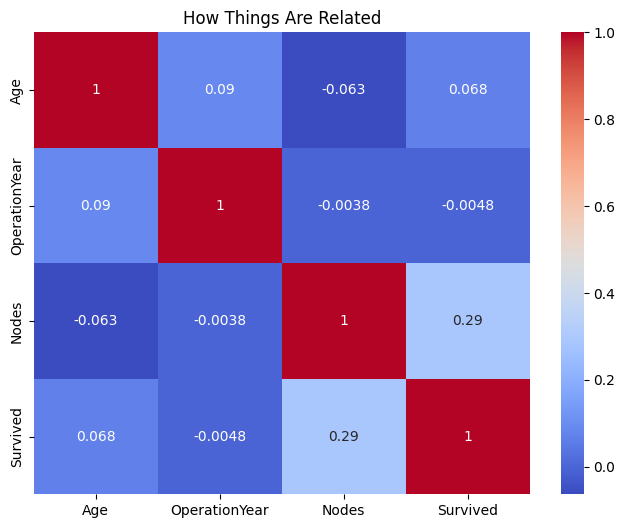

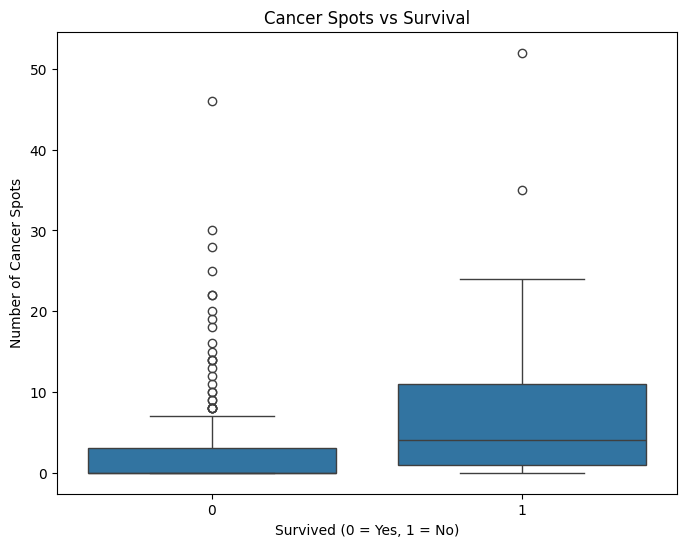

In [21]:
# Show basic numbers about the data (like averages)
print("Basic Info About Our Data:")
print(data.describe())

# Check if any data is missing
print("\nAny Missing Numbers?")
print(data.isnull().sum())

# Import the seaborn library
import seaborn as sns

# Draw a picture of how many survived or died
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=data)  # Counts how many 0s and 1s
plt.title('How Many Survived or Died?')
plt.xlabel('Survived (0 = Yes, 1 = No)')
plt.ylabel('How Many')
plt.show()

# Draw a picture to see how things are related
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')  # Shows how things affect survival
plt.title('How Things Are Related')
plt.show()

# Draw a box picture of Nodes vs Survived
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Nodes', data=data)
plt.title('Cancer Spots vs Survival')
plt.xlabel('Survived (0 = Yes, 1 = No)')
plt.ylabel('Number of Cancer Spots')
plt.show()

### Splitting Data into Train/Test

In [22]:
# Split into patient info (X) and survival (y)
X = data.drop('Survived', axis=1)  # All columns except Survived
y = data['Survived']  # Just the Survived column

# Split into practice (80%) and test (20%)
X_practice, X_test, y_practice, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Practice data size:", X_practice.shape)
print("Test data size:", X_test.shape)

Practice data size: (244, 3)
Test data size: (62, 3)


### Building the Pipeline

In [25]:
# List of our patient info
patient_info = X.columns.tolist()

# Make numbers easier to work with
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), patient_info)
    ])

# Import LogisticRegression here
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier here
from sklearn.ensemble import RandomForestClassifier # Import RandomForestClassifier here

# Simple guessing tool (Logistic Regression)
simple_guesser = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('guesser', LogisticRegression(random_state=42))
])

# Fancier guessing tool (Random Forest) with a way to find the best settings
fancy_guesser = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('guesser', RandomForestClassifier(random_state=42))
])

# Try different settings for the fancy guesser
settings_to_try = {
    'guesser__n_estimators': [50, 100],  # How many trees to use
    'guesser__max_depth': [5, 10]  # How deep each tree can go
}
best_fancy_guesser = GridSearchCV(fancy_guesser, settings_to_try, cv=5, scoring='accuracy')

### Executing the Model

In [26]:
# Teach the simple guesser
simple_guesser.fit(X_practice, y_practice)

# Teach the fancy guesser and find the best settings
best_fancy_guesser.fit(X_practice, y_practice)
print("Best settings for fancy guesser:", best_fancy_guesser.best_params_)

Best settings for fancy guesser: {'guesser__max_depth': 5, 'guesser__n_estimators': 100}


### Evaluating Model

Simple Guesser Results:
              precision    recall  f1-score   support

           0       0.73      0.91      0.81        44
           1       0.43      0.17      0.24        18

    accuracy                           0.69        62
   macro avg       0.58      0.54      0.52        62
weighted avg       0.64      0.69      0.64        62

How Many Right (Accuracy): 0.6935483870967742


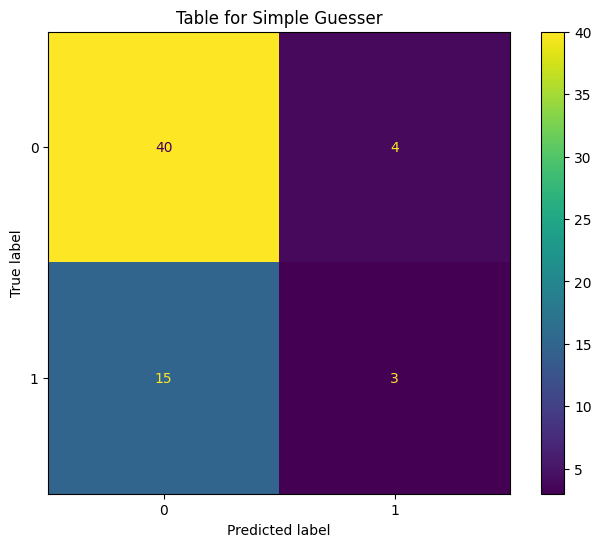

Fancy Guesser Results:
              precision    recall  f1-score   support

           0       0.74      0.89      0.80        44
           1       0.44      0.22      0.30        18

    accuracy                           0.69        62
   macro avg       0.59      0.55      0.55        62
weighted avg       0.65      0.69      0.66        62

How Many Right (Accuracy): 0.6935483870967742


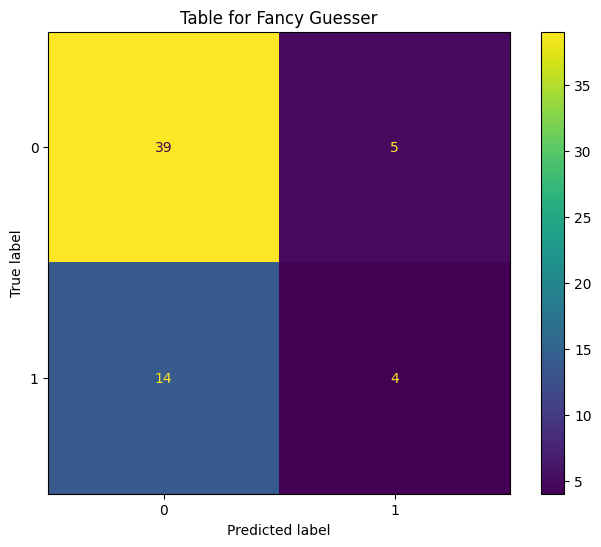

In [31]:
# Make guesses with both tools
guesses_simple = simple_guesser.predict(X_test)
guesses_fancy = best_fancy_guesser.predict(X_test)

# Import classification_report and accuracy_score here
from sklearn.metrics import classification_report, accuracy_score # Import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay # import ConfusionMatrixDisplay here as well

# Check the simple guesser
print("Simple Guesser Results:")
print(classification_report(y_test, guesses_simple))
print("How Many Right (Accuracy):", accuracy_score(y_test, guesses_simple))

# Draw a table for the simple guesser
table = ConfusionMatrixDisplay.from_predictions(y_test, guesses_simple)
table.figure_.set_size_inches(8, 6)
plt.title('Table for Simple Guesser')
plt.show()

# Check the fancy guesser
print("Fancy Guesser Results:")
print(classification_report(y_test, guesses_fancy))
print("How Many Right (Accuracy):", accuracy_score(y_test, guesses_fancy))

# Draw a table for the fancy guesser
table = ConfusionMatrixDisplay.from_predictions(y_test, guesses_fancy)
table.figure_.set_size_inches(8, 6)
plt.title('Table for Fancy Guesser')
plt.show()